In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [4]:
# Reshape input data to have a single channel
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [5]:
# Convert labels to one-hot encoded vectors
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [7]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 57s 37ms/step - loss: 0.1510 - accuracy: 0.9528 - val_loss: 0.0629 - val_accuracy: 0.9802
Epoch 2/5
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0490 - accuracy: 0.9845 - val_loss: 0.0415 - val_accuracy: 0.9876
Epoch 3/5
1500/1500 [==============================] - 57s 38ms/step - loss: 0.0332 - accuracy: 0.9900 - val_loss: 0.0419 - val_accuracy: 0.9872
Epoch 4/5
1500/1500 [==============================] - 59s 40ms/step - loss: 0.0231 - accuracy: 0.9923 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 5/5
1500/1500 [==============================] - 62s 42ms/step - loss: 0.0178 - accuracy: 0.9938 - val_loss: 0.0373 - val_accuracy: 0.9907


In [9]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_accuracy)

313/313 [==============================] - 5s 16ms/step - loss: 0.0273 - accuracy: 0.9911
Test Accuracy: 0.991100013256073


In [10]:
y_pred = model.predict(x_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

313/313 [==============================] - 5s 13ms/step


In [11]:
cm = confusion_matrix(y_true_labels, y_pred_labels)

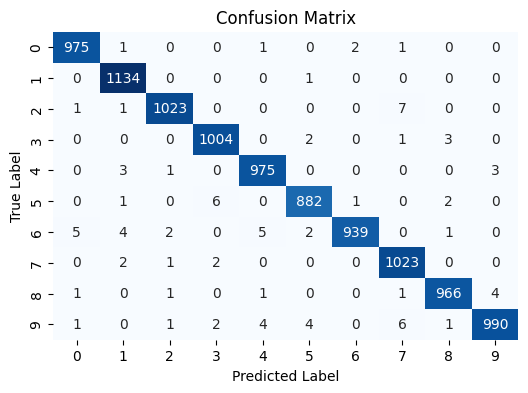

In [12]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()